In [1]:
# Exploratory data analysis
import warnings  
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where
from pathlib import Path

In [15]:
train_data = pd.read_csv("../data-sets/train.csv")

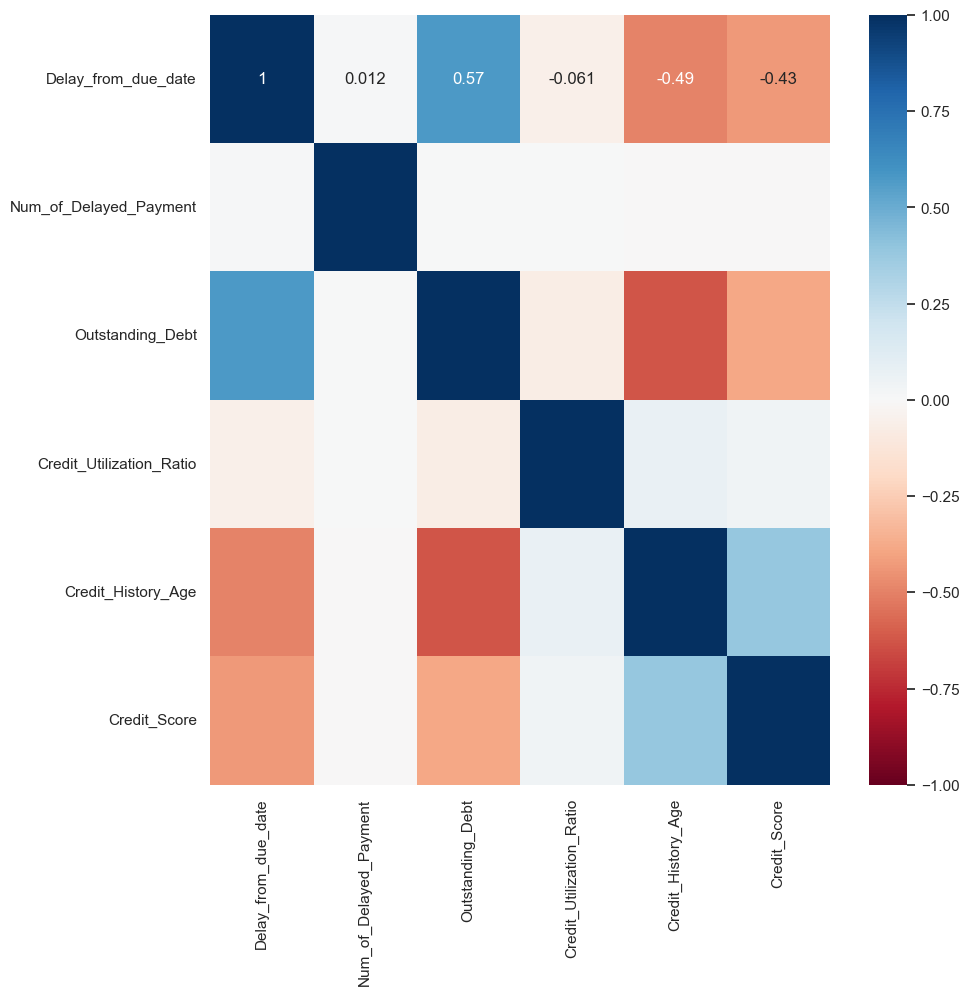

In [9]:
def cleanData(a):
    df = a
    # Drop the column which is out of model scope
    d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
             'Payment_of_Min_Amount', 'Payment_Behaviour', 
             'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
             'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
             'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
    drop_df = df.drop(d_col, axis=1).copy()
    drop_df.isnull().sum()
    drop_na = drop_df.dropna().copy()
    # Revise the incorrect data whole table
    sym = "\\`*_{}[]()>#@+!$:;"
    col_int = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt']
    col_str = ['Credit_Score', 'Credit_History_Age']
    for i in col_int:
        for c in sym:
            drop_na[i] = drop_na[i].astype(str).str.replace(c, '')
    for i in col_str:
        for c in sym:
            drop_na[i] = drop_na[i].replace(c, '')

    # Transform the information to the value
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ', '.')
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months', '')

    # Transform the object data the be float data type
    col_int2 = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age']
    for i in col_int2:
        drop_na[i] = drop_na[i].astype(float)

    return drop_na

#map credit scores to number
creditScoreMap = {'Poor': 1, 'Standard': 2, 'Good': 3}
train_data['Credit_Score'] = train_data['Credit_Score'].replace(creditScoreMap)

df=cleanData(train_data)

# for item in clean:
#     print(train[item])

#copy data and drop non-numeric columns
# df = train_data.copy().drop(columns=drop)

#plot heatmap
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')






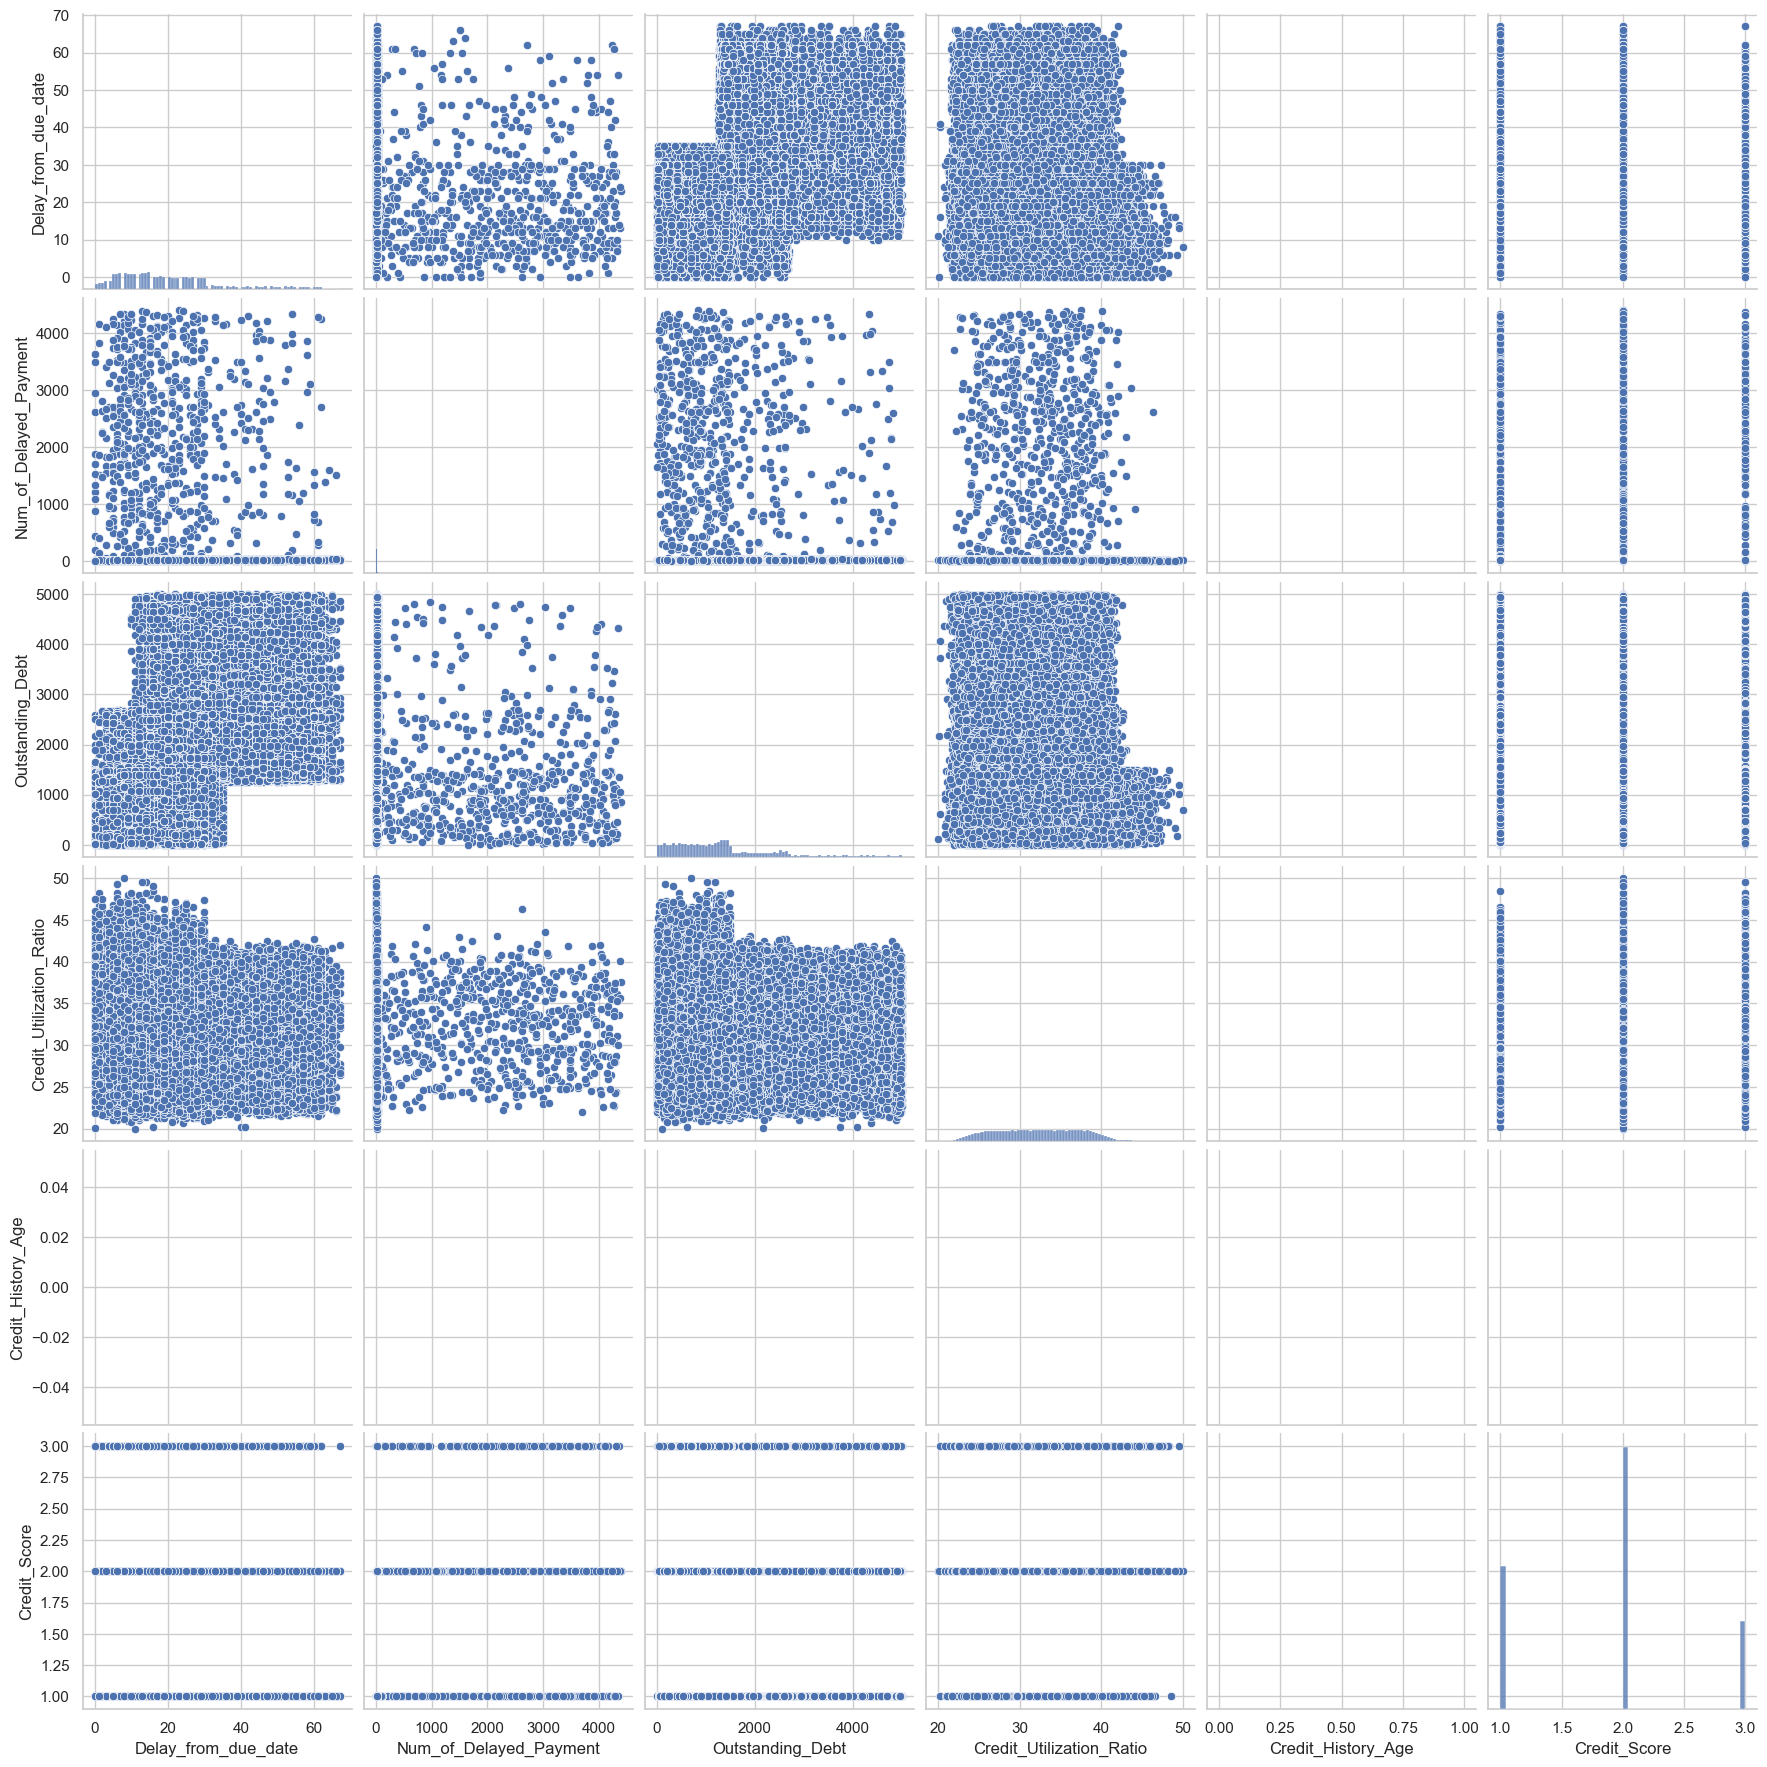

In [6]:
# pairplot
sns.set_style("whitegrid")
d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
        'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
drop_df = train_data.drop(d_col , axis=1).copy()
sns.pairplot(drop_df, height=3)